In [1]:
# initialize our starting variables
header = None
length = 0
lengths_03513 = {}
onlyLengths_03513 = []

# open our text file of sequences
with open('03513/03513_all.txt') as fasta:
    # iterate through each line
    for line in fasta:
        # trim newlines
        line = line.rstrip()

        # if we hit a header, let's go into it
        if line.startswith('>'):
            # if we captured a header before, print the length now and reset
            if header is not None:
                lengths_03513[header] = length
                onlyLengths_03513.append(length)
                length = 0
            header = line[1:]
        # otherwise, let's add this length to the previous sequence length
        else:
            length += len(line)
            
# make sure to print the last header and length
if length:
    lengths_03513[header] = length
    onlyLengths_03513.append(length)

In [2]:
# initialize our starting variables
header = None
length = 0
lengths_03514 = {}
onlyLengths_03514 = []

# open our text file of sequences
with open('03514/03514_all.txt') as fasta:
    # iterate through each line
    for line in fasta:
        # trim newlines
        line = line.rstrip()

        # if we hit a header, let's go into it
        if line.startswith('>'):
            # if we captured a header before, print the length now and reset
            if header is not None:
                lengths_03514[header] = length
                onlyLengths_03514.append(length)
                length = 0
            header = line[1:]
        # otherwise, let's add this length to the previous sequence length
        else:
            length += len(line)
            
# make sure to print the last header and length
if length:
    lengths_03514[header] = length
    onlyLengths_03514.append(length)

In [3]:
# find the most common sequence length for each gene's sequences

from statistics import mode

print("Sequence 03513 has most common sequence length of",mode(onlyLengths_03513),"while the actual sequence length is 250.")
print("Sequence 03514 has most common sequence length of",mode(onlyLengths_03514),"while the actual sequence length is 263.")

Sequence 03513 has most common sequence length of 233 while the actual sequence length is 250.
Sequence 03514 has most common sequence length of 263 while the actual sequence length is 263.


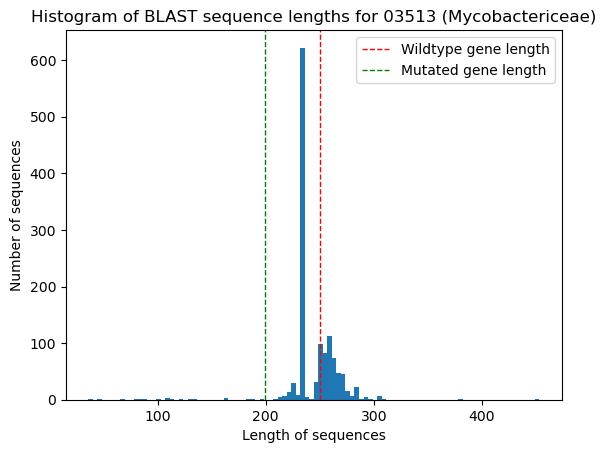

In [4]:
import matplotlib.pyplot as plt

plt.hist(onlyLengths_03513, bins = 100)
plt.axvline(x=250,color='red',linestyle='dashed',linewidth=1,label="Wildtype gene length")
plt.axvline(x=199,color='green',linestyle='dashed',linewidth=1,label="Mutated gene length")
plt.title("Histogram of BLAST sequence lengths for 03513 (Mycobactericeae)")
plt.ylabel("Number of sequences")
plt.xlabel("Length of sequences")
plt.legend(loc='upper right')

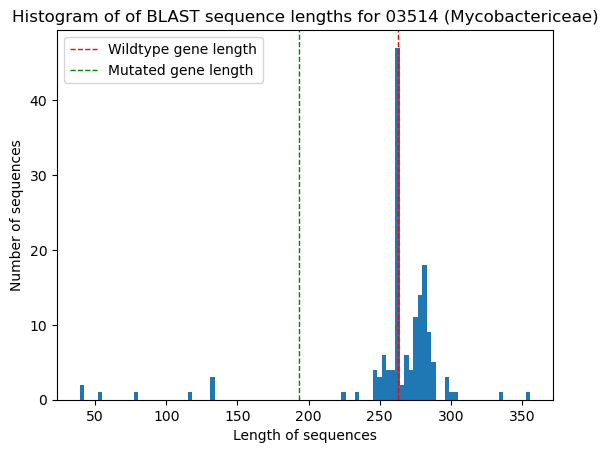

In [5]:
plt.hist(onlyLengths_03514, bins = 100)
plt.axvline(x=263,color='red',linestyle='dashed',linewidth=1,label="Wildtype gene length")
plt.axvline(x=193,color='green',linestyle='dashed',linewidth=1,label="Mutated gene length")
plt.title("Histogram of of BLAST sequence lengths for 03514 (Mycobactericeae)")
plt.ylabel("Number of sequences")
plt.xlabel("Length of sequences")
plt.legend(loc='upper left')

In [6]:
# from BLAST search of the assembled mutated isolates against the unmutated genes:
print('Unmutated 03513 gene length =',250,'while mutated gene length =',199)
print('Unmutated 03514 gene length =',263,'while mutated gene length =',193)

Unmutated 03513 gene length = 250 while mutated gene length = 199
Unmutated 03514 gene length = 263 while mutated gene length = 193


In [7]:
print("We don't see any BLAST sequences with the exact same length as the shortened mutated gene.")

We don't see any BLAST sequences with the exact same length as the shortened mutated gene.


In [12]:
# identify the sequences that have a smaller length than the actual length of the gene and print to file

import pandas as pd

d_sorted = {key: value for key, value in sorted(lengths_03513.items(), key=lambda x: x[1] > 0)}

df = pd.DataFrame(data=d_sorted, index=[0])
df = (df.T)

df.to_excel('03513ShortSequences.xlsx')


In [13]:
d_sorted = {key: value for key, value in sorted(lengths_03514.items(), key=lambda x: x[1] < 263)}

df = pd.DataFrame(data=d_sorted, index=[0])
df = (df.T)

df.to_excel('03514ShortSequences.xlsx')

In [14]:
# identify any BLAST sequences that come from the same genome
found = {}
duplicates_03513 = []

for i in lengths_03513.keys():
    # save off our genome name
    i_split = i.split(" ") 
    name = i_split[0]

    # find the prefix
    if name[:3] == "WP_":
        value = name[:8]
    else:
        value = name[:6]

    # check if we've seen this genome before
    if value in found.keys():
        # if we have, let's append both this genome and the previous one to our duplicates list
        duplicates_03513.append(i)
        duplicates_03513.append(found[value])
    else:
        # otherwise, we'll mark this off as seen
        found[value] = i

In [15]:
duplicates_03513

['WP_074333016.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_074335075.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_100468648.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_100464559.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_100484997.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_100489892.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_100469418.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_100464559.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_074334162.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_074335075.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_005086708.1 IclR family transcriptional regulator [Mycobacteroides abscessus]',
 'WP_005083380.1 IclR family transcriptional regulator [Mycobacte

In [16]:
# identify any BLAST sequences that come from the same genome
found = {}
duplicates_03514 = []

for i in lengths_03514.keys():
    # save off our genome name
    i_split = i.split(" ") 
    name = i_split[0]

    # find the prefix
    if name[:3] == "WP_":
        value = name[:8]
    else:
        value = name[:6]

    # check if we've seen this genome before
    if value in found.keys():
        # if we have, let's append both this genome and the previous one to our duplicates list
        duplicates_03514.append(i)
        duplicates_03514.append(found[value])
    else:
        # otherwise, we'll mark this off as seen
        found[value] = i

In [17]:
duplicates_03514

['WP_005083377.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_005086707.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100469416.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100468650.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100454819.1 helix-turn-helix domain-containing protein [Mycobacteroides abscessus]',
 'WP_100459634.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100464558.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100468650.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100466705.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus]',
 'WP_100468650.1 IclR 

In [22]:
# identify any BLAST sequences that come from the same genome
found = {}
duplicates_03513and4 = []

for i in lengths_03513.keys():
    # save off our genome name
    i_split = i.split(" ") 
    name = i_split[0]

    # find the prefix
    if name[:3] == "WP_":
        value = name[:8]
    else:
        value = name[:6]
        
    # mark this off as seen
    found[value] = i

for i in lengths_03514.keys():
    # save off our genome name
    i_split = i.split(" ") 
    name = i_split[0]

    # find the prefix
    if name[:3] == "WP_":
        value = name[:8]
    else:
        value = name[:6]

    # check if we've seen this genome before
    if value in found.keys():
        # if we have, let's append both this genome and the previous one to our duplicates list
        duplicates_03513and4.append(i+" 03514")
        duplicates_03513and4.append(found[value]+" 03513")
    else:
        # otherwise, we'll mark this off as seen
        found[value] = i

In [23]:
duplicates_03513and4

['WP_079624761.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus] 03514',
 'WP_079624760.1 IclR family transcriptional regulator [Mycobacteroides abscessus] 03513',
 'WP_005086707.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus] 03514',
 'WP_005086708.1 IclR family transcriptional regulator [Mycobacteroides abscessus] 03513',
 'WP_005083377.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus] 03514',
 'WP_005086708.1 IclR family transcriptional regulator [Mycobacteroides abscessus] 03513',
 'WP_100485742.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus] 03514',
 'WP_100484997.1 IclR family transcriptional regulator [Mycobacteroides abscessus] 03513',
 'WP_079610575.1 IclR family transcriptional regulator domain-containing protein [Mycobacteroides abscessus] 03514',
 'WP_079613984.1 IclR family transcriptional regula